In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
# import statistics 
# import collections
# import seaborn as sns

In [2]:
class JUGGLER:
    def __init__(self,name,prob):
        self.name = name
        self.prob = prob

In [3]:
prob=[[1/273,1/439,1/1092.27,1/1092.27,1/6.489,1/7.298,1/33.3], 
      [1/269.7,1/399.6,1/1092.27,1/1092.27,1/6.489,1/7.298,1/33.3], 
      [1/269.7,1/331,1/1092.27,1/1092.27,1/6.489,1/7.298,1/33.3],
      [1/259,1/315.1,1/1092.27,1/1092.27,1/6.489,1/7.298,1/33.3],
      [1/259,1/255.1,1/1092.27,1/1092.27,1/6.489,1/7.298,1/33.3],
      [1/255,1/255.1,1/1092.27,1/1092.27,1/6.183,1/7.298,1/33.3]]
#アイムジャグラー6号機の確率
index1 = ["設定1", "設定2", "設定3","設定4", "設定5", "設定6"]
columns1 =["BIG", "REG", "ピエロ","ベル", "ぶどう","リプレイ", "チェリー"]
df = pd.DataFrame(data=prob, index=index1, columns=columns1)
df

,BIG,REG,ピエロ,ベル,ぶどう,リプレイ,チェリー
設定1,0.003663,0.002278,0.000916,0.000916,0.154107,0.137024,0.03003
設定2,0.003708,0.002503,0.000916,0.000916,0.154107,0.137024,0.03003
設定3,0.003708,0.003021,0.000916,0.000916,0.154107,0.137024,0.03003
設定4,0.003861,0.003174,0.000916,0.000916,0.154107,0.137024,0.03003
設定5,0.003861,0.003920,0.000916,0.000916,0.154107,0.137024,0.03003
設定6,0.003922,0.003920,0.000916,0.000916,0.161734,0.137024,0.03003


In [4]:
#役払い出し
BB = 252
RB = 96
GRAPE = 5
CHERRY = -2
PIERROT = 7
BELL = 11

設定2
試行回数10
一試行あたりG数3000000
[差枚数]
[機械割]
-338546枚
89%
-307195枚
90%
-331480枚
89%


KeyboardInterrupt: 

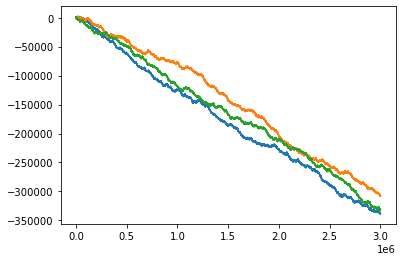

In [5]:
SETTEI =2
SHIKOU = 10
KAI = 3000000
print("設定" + str(SETTEI))
print("試行回数" + str(SHIKOU))
print("一試行あたりG数" + str(KAI))
print("[差枚数]" )
print("[機械割]" )


def simulation (SETTEI,KAI):#設定、回数での入賞数と差枚数  
    bb = 0
    rb = 0
    grape = 0
    medal = 0
    sum_medal =[]
    n = SETTEI -1

    PROB_BB = df.iat[n,0]
    PROB_RB = PROB_BB + df.iat[n,1]    
    PROB_PIERROT = PROB_RB + df.iat[n,2]
    PROB_BELL = PROB_PIERROT + df.iat[n,3]
    PROB_GRAPE = PROB_BELL + df.iat[n,4]
    PROB_REPLAY = PROB_GRAPE + df.iat[n,5]
    PROB_CHERRY = PROB_REPLAY + df.iat[n,6]

    
    for sim in range (1,KAI+1):
        hantei = random.random()

        if hantei <= (PROB_BB):
            medal += BB
            sum_medal.append(medal)
            bb += 1

        elif hantei <= (PROB_RB):
            medal += RB
            sum_medal.append(medal)
            rb += 1
            
        elif hantei <= (PROB_PIERROT):
            medal += PIERROT
            sum_medal.append(medal)
        
        elif hantei <= (PROB_BELL):
            medal += BELL
            sum_medal.append(medal)

        elif hantei <= (PROB_GRAPE):
            medal += GRAPE
            sum_medal.append(medal)
            grape += 1

        elif hantei <= (PROB_REPLAY):
            medal += 0
            sum_medal.append(medal)

        elif hantei <= (PROB_CHERRY):
            medal += CHERRY
            sum_medal.append(medal)   

        else :
            medal += -3
            sum_medal.append(medal)

    bb_ratio = round((KAI+1 )/ bb)
    rb_ratio = round((KAI+1) / rb)
    grape_ratio = round((KAI+1) / grape , 3)
        
    print(str(medal)+"枚")
    percentage =round((1+medal/ (KAI))*100)
    print(str(percentage)+"%")
    
    #設定域判別（教師データ用）
    if SETTEI <= 2:
        SETTEI = -1
    elif SETTEI <=4:
        SETTEI = 0
    else:
        SETTEI = 1
        
    df2 = pd.DataFrame([[SETTEI,bb_ratio, rb_ratio, grape_ratio,medal]],columns=["設定",'BB', 'RB', 'ぶどう','差枚数'])
    df2.to_csv(r"C:\Users\stone/juggler.csv", mode = 'a', header = False, index = False)
    
    plt.plot(sum_medal)
    

for sim in range (SHIKOU):
#     i = random.randrange(1,7)
    simulation (SETTEI,KAI)


#平均差枚数とヒストグラム作成
# print(sum(medal))

In [ ]:
df3 = pd.read_csv(r"C:\Users\stone/juggler.csv",header=None, names=["設定",'BB', 'RB', 'ぶどう','差枚数'])   
df3

In [ ]:
Y = df3["設定"]
Y.values.reshape(-1,1)
X = df3[["BB","RB","ぶどう","差枚数"]]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
score = model.score(X_test, Y_test)
pred = model.predict(X_test)

print(score)